# 데모

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## 학습데이터 로드

[03-pandas-eda.ipynb](https://github.com/kaggler-tv/dku-kaggle-class/blob/master/notebook/03-pandas-eda.ipynb)에서 생성한 `feature.csv` 피처파일 사용

In [4]:
data_dir = Path('../data/dacon-dku')
feature_dir = Path('../build/feature')
val_dir = Path('../build/val')
tst_dir = Path('../build/tst')
sub_dir = Path('../build/sub')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
n_fold = 5
n_class = 3
seed = 42

In [5]:
algo_name = 'lrcv'
feature_name = 'polyfeature'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
p_val_file = val_dir / f'{model_name}.val.csv'
p_tst_file = tst_dir / f'{model_name}.tst.csv'
sub_file = sub_dir / f'{model_name}.csv'

## Polynomial Feature 생성

In [6]:
df = pd.read_csv('C:/Users/leeji/ML_/2020 캐글뽀개기/dataset/input/feature.csv', index_col=0)
print(df.shape)
df.head()

(400000, 20)


z    redshift  dered_u  dered_g  dered_r  dered_i  dered_z  \
id                                                                     
0   16.9396 -8.1086e-05  23.1243  20.2578  18.9551  17.6321  16.9089   
1   13.1689  4.5061e-03  14.9664  14.0045  13.4114  13.2363  13.1347   
2   15.3500  4.7198e-04  16.6076  15.6866  15.4400  15.3217  15.2961   
3   19.6346  5.8143e-06  25.3536  20.9947  20.0873  19.7947  19.5552   
4   17.9826 -3.3247e-05  23.7714  20.4338  18.8630  18.1903  17.8759   

    nObserve  airmass_u  class  d_dered_u  d_dered_g  d_dered_r  d_dered_i  \
id                                                                           
0     2.9444     1.1898    0.0    -0.1397    -0.0790    -0.0544    -0.0403   
1     0.6931     1.2533    1.0    -0.0857    -0.0574    -0.0410    -0.0322   
2     1.0986     1.0225    0.0    -0.1787    -0.1388    -0.0963    -0.0718   
3     1.6094     1.2054    0.0    -0.3070    -0.1941    -0.1339    -0.1003   
4     2.6391     1.1939    0.0    -0.6820    -0.2653    -0.1794    -0.1339   

    d_dered_z  d_dered_ig  d_dered_zg  d_dered_rz  d_dered_iz  d_obs_det  
id                                                                        
0     -0.0307     -2.6257     -3.3488      2.0462      0.7232   -15.0556  
1     -0.0343     -0.7683     -0.8698      0.2767      0.1016    -0.3069  
2     -0.0540     -0.3649     -0.3905      0.1440      0.0257    -0.9014  
3     -0.0795     -1.2000     -1.4395      0.5321      0.2395    -1.3906  
4     -0.1067     -2.2436     -2.5579      0.9871      0.3144    -9.3609

In [7]:
scaler = StandardScaler()
poly = PolynomialFeatures(2)
X = poly.fit_transform(scaler.fit_transform(df.drop(target_col, axis=1)))
feature_names = poly.get_feature_names(df.columns)
feature_names

['1',
 'z',
 'redshift',
 'dered_u',
 'dered_g',
 'dered_r',
 'dered_i',
 'dered_z',
 'nObserve',
 'airmass_u',
 'class',
 'd_dered_u',
 'd_dered_g',
 'd_dered_r',
 'd_dered_i',
 'd_dered_z',
 'd_dered_ig',
 'd_dered_zg',
 'd_dered_rz',
 'd_dered_iz',
 'z^2',
 'z redshift',
 'z dered_u',
 'z dered_g',
 'z dered_r',
 'z dered_i',
 'z dered_z',
 'z nObserve',
 'z airmass_u',
 'z class',
 'z d_dered_u',
 'z d_dered_g',
 'z d_dered_r',
 'z d_dered_i',
 'z d_dered_z',
 'z d_dered_ig',
 'z d_dered_zg',
 'z d_dered_rz',
 'z d_dered_iz',
 'redshift^2',
 'redshift dered_u',
 'redshift dered_g',
 'redshift dered_r',
 'redshift dered_i',
 'redshift dered_z',
 'redshift nObserve',
 'redshift airmass_u',
 'redshift class',
 'redshift d_dered_u',
 'redshift d_dered_g',
 'redshift d_dered_r',
 'redshift d_dered_i',
 'redshift d_dered_z',
 'redshift d_dered_ig',
 'redshift d_dered_zg',
 'redshift d_dered_rz',
 'redshift d_dered_iz',
 'dered_u^2',
 'dered_u dered_g',
 'dered_u dered_r',
 'dered_u dered

In [8]:
df_poly = pd.DataFrame(data=X, columns=feature_names, index=df.index)
df_poly[target_col] = df[target_col]
df_poly.head()
df_poly.to_csv(feature_file)

FileNotFoundError: [Errno 2] No such file or directory: '..\\build\\feature\\polyfeature.csv'

In [ ]:
del df_poly, df

In [ ]:
df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
df.head()

In [ ]:
y = df[target_col].values[:320000]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:320000].values
tst = df.iloc[320000:].values
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

## Stratified K-Fold Cross Validation

In [ ]:
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

## Logistic Regression 모델 학습

In [9]:
p_val = np.zeros((trn.shape[0], n_class))
p_tst = np.zeros((tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    clf = LogisticRegression(multi_class='multinomial')
    clf.fit(trn[i_trn], y[i_trn])
    p_val[i_val, :] = clf.predict_proba(trn[i_val])
    p_tst += clf.predict_proba(tst) / n_fold

NameError: name 'trn' is not defined

In [10]:
print(f'{accuracy_score(y, np.argmax(p_val, axis=1)) * 100:.4f}%')

NameError: name 'y' is not defined

In [22]:
print(p_val.shape, p_tst.shape)

(320000, 3) (80000, 3)


In [23]:
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=',')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=',')

## 피처 중요도 시각화

In [24]:
clf.coef_.shape

(3, 209)

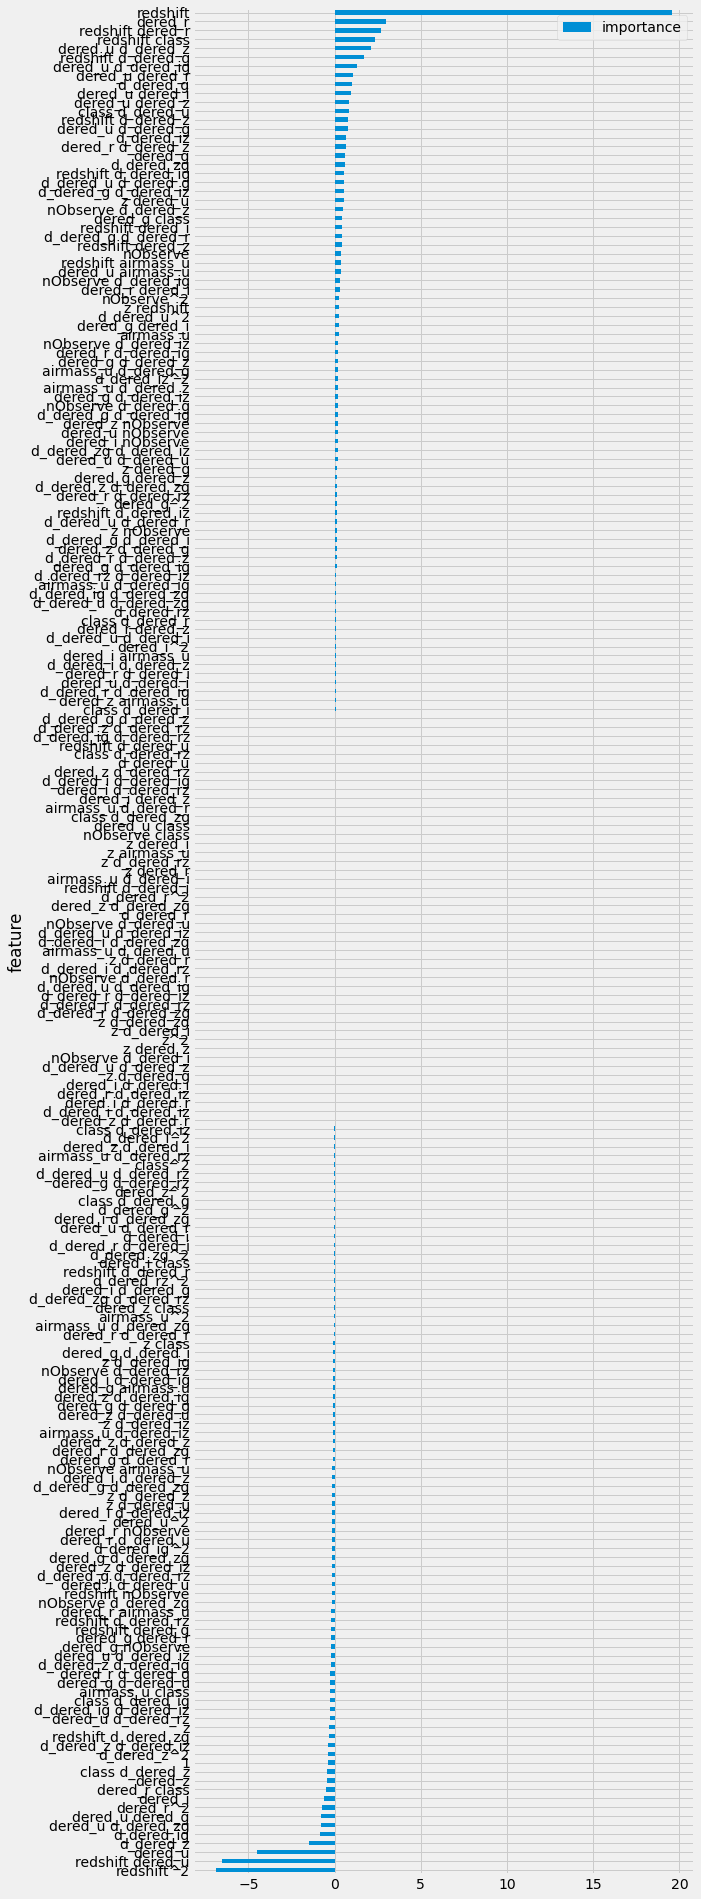

In [31]:
imp = pd.DataFrame({'feature': df.columns, 'importance': clf.coef_[1, :].T})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh', figsize=(8, 32))

## 제출 파일 생성

In [32]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


class
id           
320000      0
320001      0
320002      0
320003      0
320004      0

In [36]:
sub[target_col] = np.argmax(p_tst, axis=1)
sub.head()

class
id           
320000      2
320001      0
320002      2
320003      0
320004      2

In [37]:
sub[target_col].value_counts()

2    42870
0    31013
1     6117
Name: class, dtype: int64

In [38]:
sub.to_csv(sub_file)